In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [102]:
data = pd.read_csv('Data_Negara_HELP.csv')
data

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [59]:
data.shape

(167, 10)

In [60]:
data.isna().sum()

Negara              0
Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64

In [61]:
data.drop_duplicates(inplace=True)

### Univariate analisis

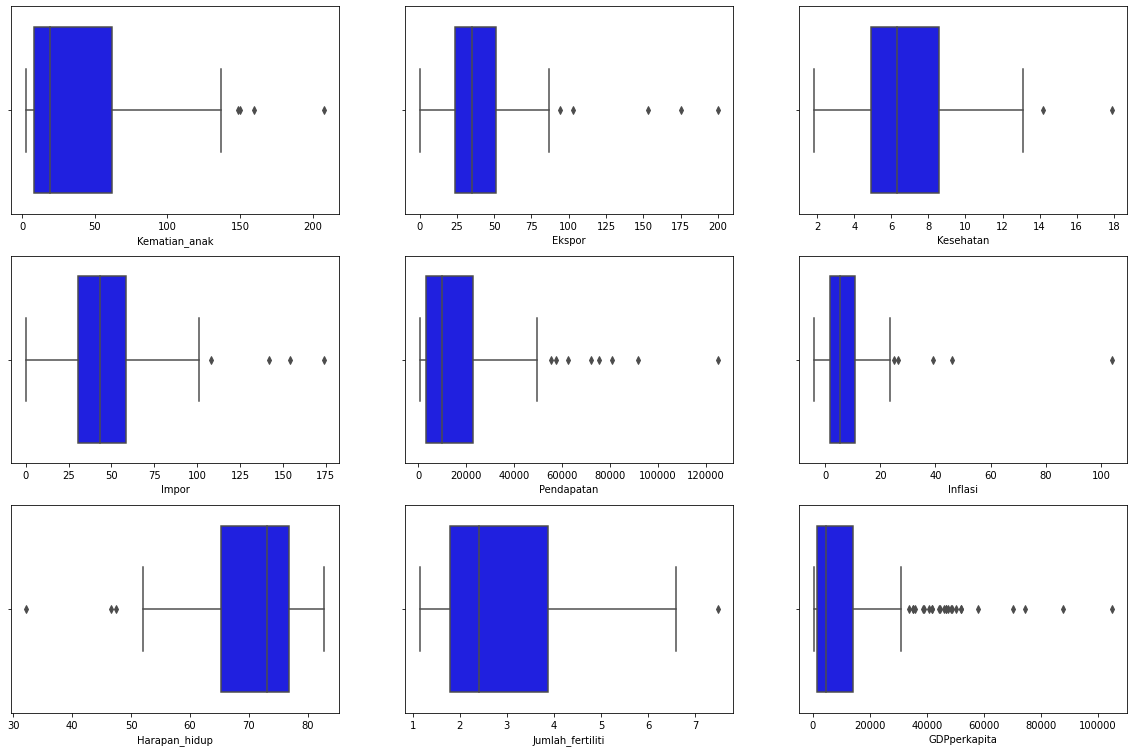

In [62]:
fig, axs = plt.subplots(3,3, figsize=(20,13))
colom = ['Kematian_anak','Ekspor','Kesehatan','Impor','Pendapatan','Inflasi','Harapan_hidup','Jumlah_fertiliti','GDPperkapita']
ax = axs.flatten()
for i, j in enumerate(colom):
    sns.boxplot(x=data[j], ax=ax[i], color='blue')

### Bivariate

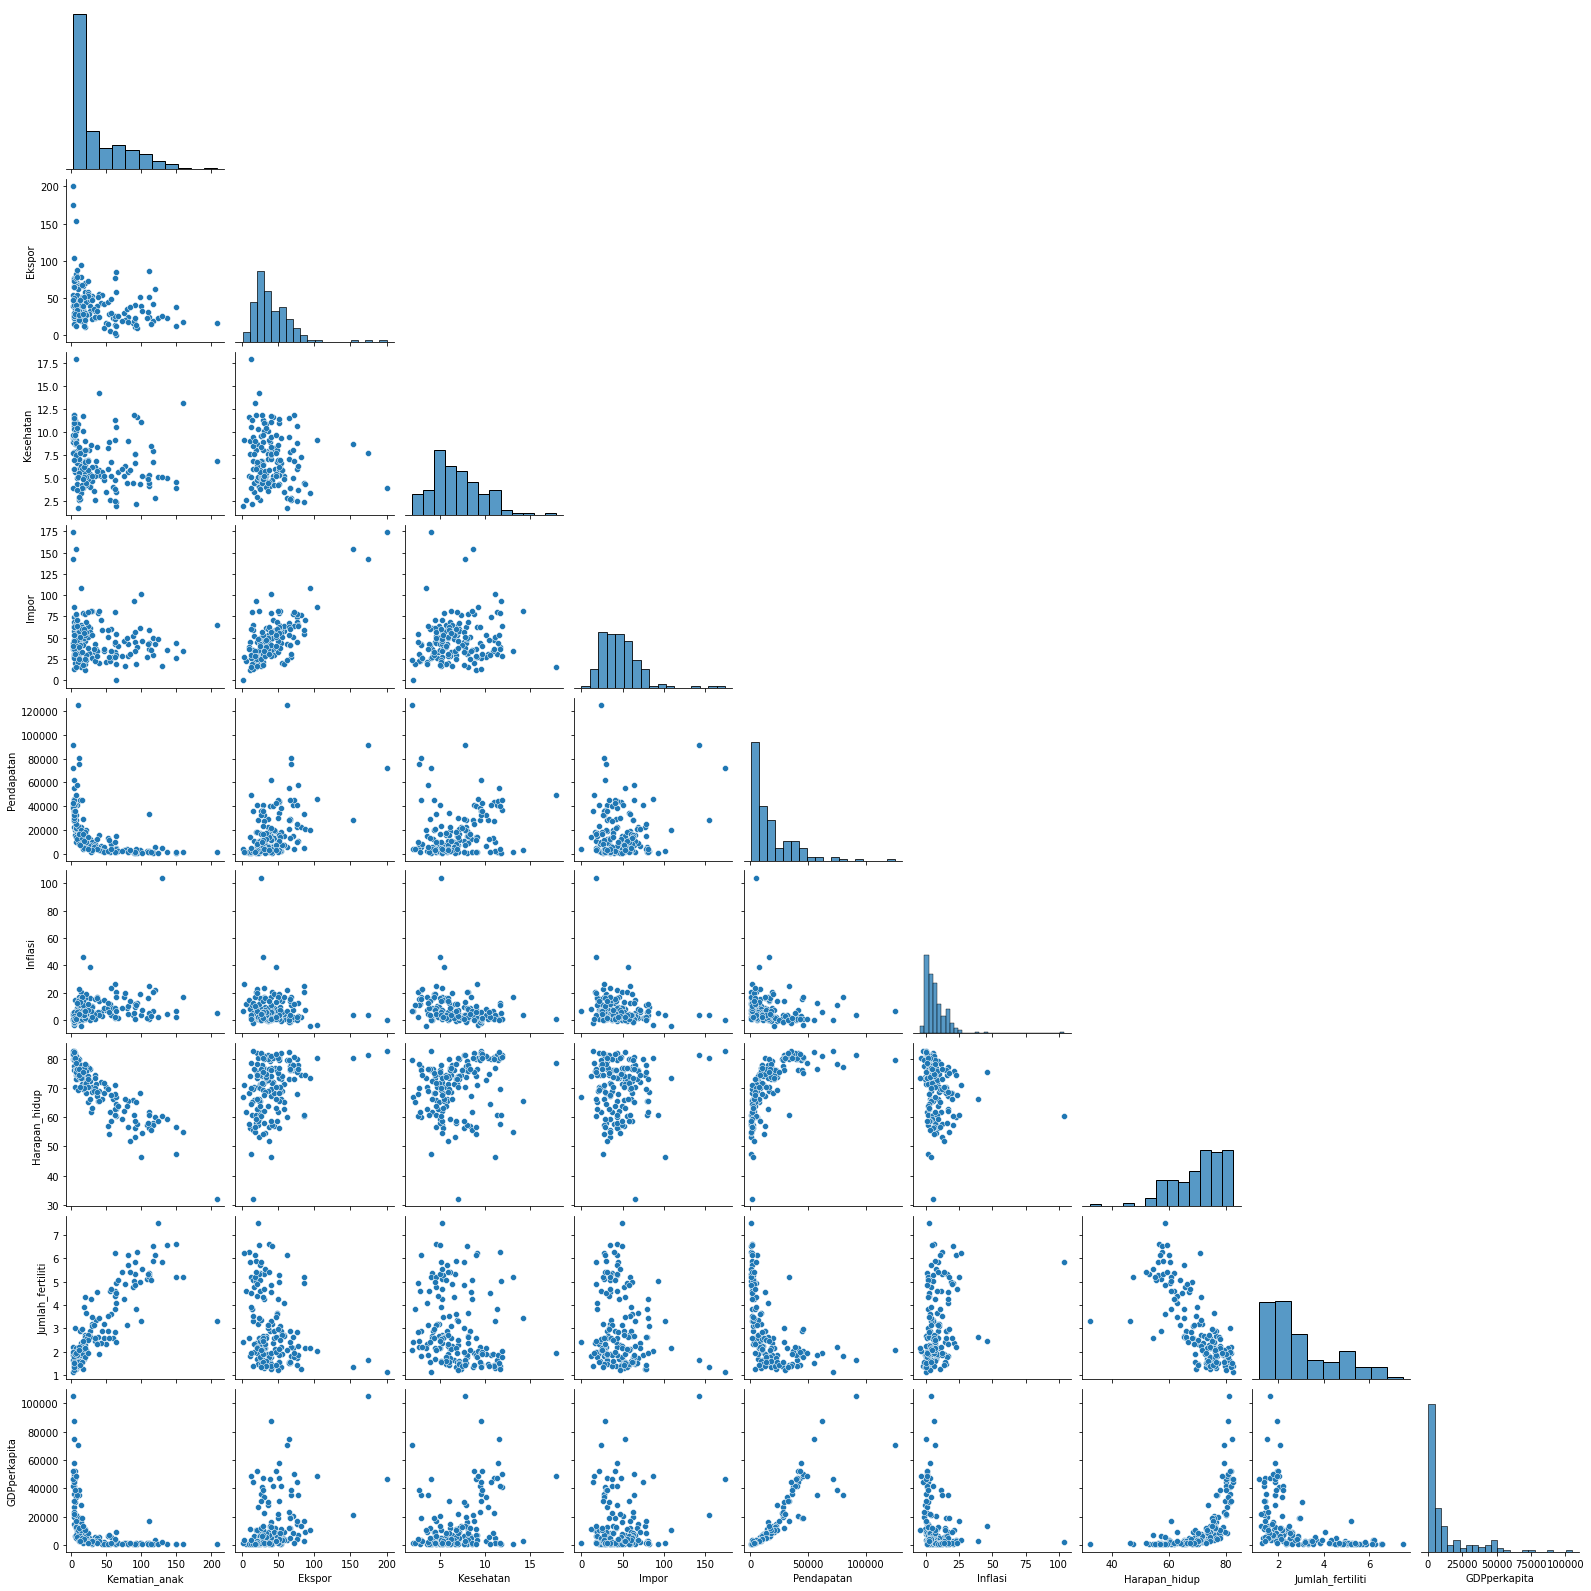

In [63]:
sns.pairplot(data, corner=True)

### korelasi

<AxesSubplot:>

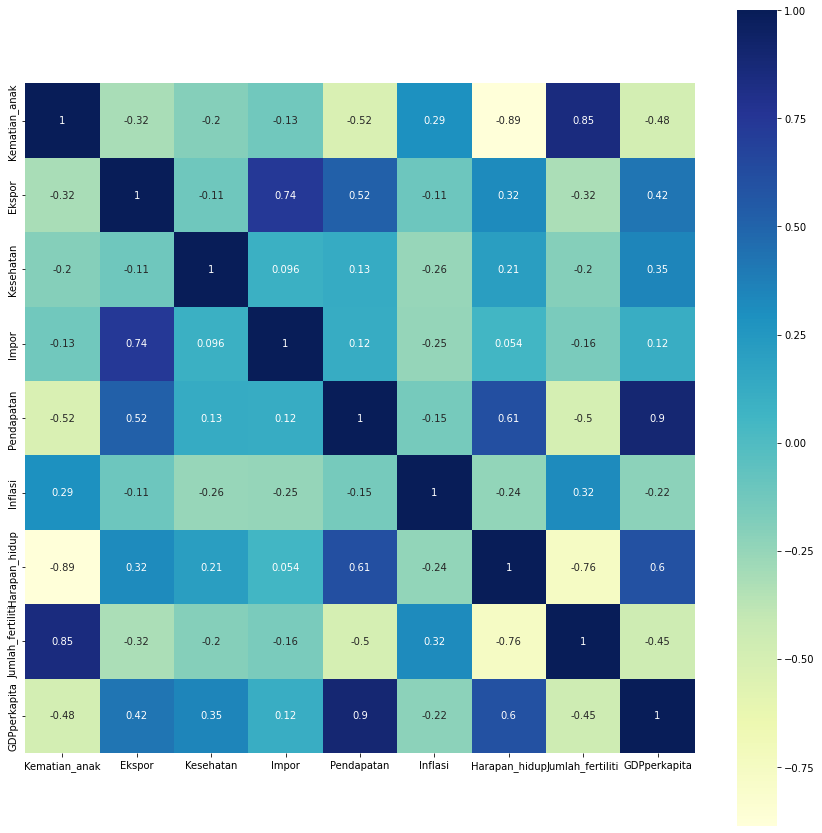

In [64]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True, square=True, cmap="YlGnBu")

In [65]:
data1 = data.drop('Negara', axis=1)

In [66]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data1 = sc.fit_transform(data1)

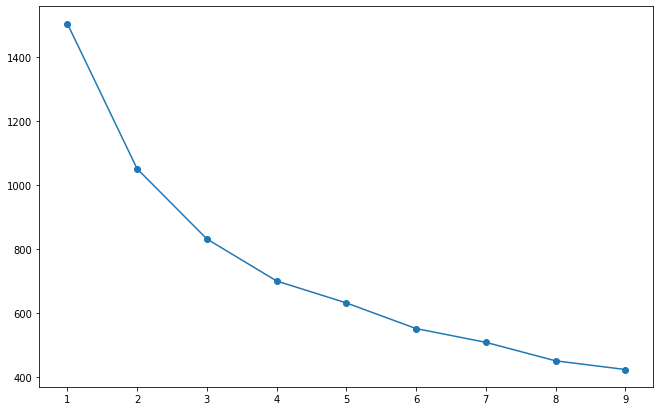

In [67]:
from sklearn.cluster import KMeans
wwcs = []
for i in range(1,10):
    k=KMeans(i)
    k.fit(data1)
    wwcs.append(k.inertia_)
    
plt.figure(figsize=(11,7))
plt.plot(range(1,10), wwcs, marker='o')

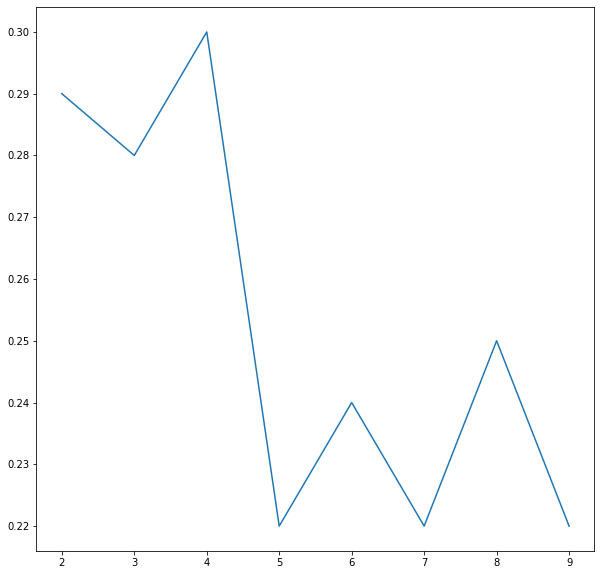

In [68]:
from sklearn.metrics import silhouette_score
nilai = []
plt.figure(figsize=(10,10))
for i in range(2,10):
    k=KMeans(i)
    k.fit(data1)
    nilai.append(np.round(silhouette_score(data1, k.labels_),2))
plt.plot(range(2,10), nilai)

In [69]:
k=KMeans(4, random_state=42)
k.fit(data1)
data['klaster'] = k.labels_

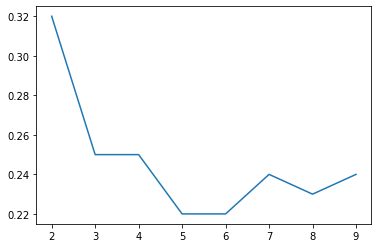

In [70]:
from sklearn.cluster import AgglomerativeClustering
score = []
for i in range (2,10):
    a=AgglomerativeClustering(i)
    a.fit(data1)
    score.append(np.round(silhouette_score(data1, a.labels_),2))

plt.plot(range(2,10), score)
                 

In [71]:
a = AgglomerativeClustering(2)
a.fit(data1)
data['siluet'] = a.labels_

In [72]:
data

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,klaster,siluet
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1,0


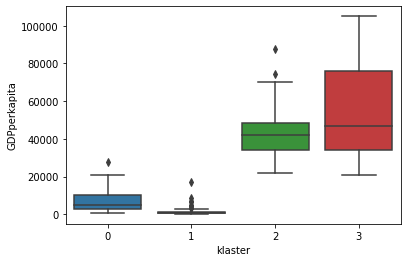

In [87]:
sns.boxplot(x = 'klaster', y = 'GDPperkapita', data= data)
plt.show()

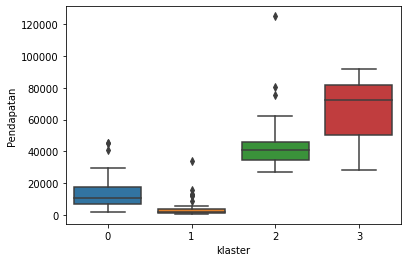

In [88]:
sns.boxplot(x = 'klaster', y = 'Pendapatan', data= data)
plt.show()

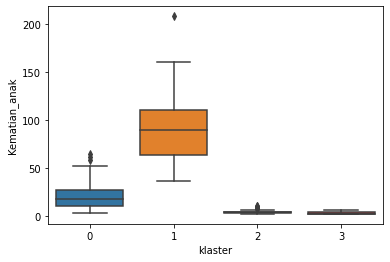

In [89]:
sns.boxplot(x = 'klaster', y = 'Kematian_anak', data= data)
plt.show()

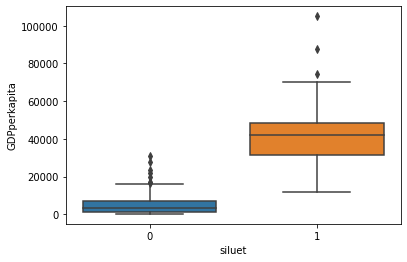

In [90]:
sns.boxplot(x = 'siluet', y = 'GDPperkapita', data= data)
plt.show()

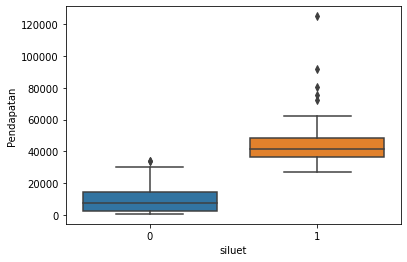

In [91]:
sns.boxplot(x = 'siluet', y = 'Pendapatan', data= data)
plt.show()

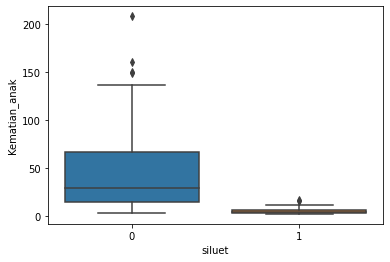

In [92]:
sns.boxplot(x = 'siluet', y = 'Kematian_anak', data= data)
plt.show()

In [99]:
negara_terbelakang = data[(data['klaster'] == 1) & (data['siluet'] == 0)]
negara_terbelakang

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,klaster,siluet
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,1,0
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,1,0
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,1,0
21,Botswana,52.5,43.60,8.30,51.3,13300,8.920,57.1,2.88,6350,1,0
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,1,0
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,1,0
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,1,0
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,1,0
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,1,0
36,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,1,0


In [100]:
negara_terbelakang.shape

(47, 12)

In [101]:
negara_terbelakang_top10 = negara_terbelakang.sort_values(by=['GDPperkapita','Pendapatan','Kematian_anak'])[:10]
negara_terbelakang_top10

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,klaster,siluet
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,1,0
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,1,0
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,1,0
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,1,0
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399,1,0
93,Madagascar,62.2,25.00,3.77,43.0,1390,8.79,60.8,4.60,413,1,0
106,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419,1,0
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446,1,0
94,Malawi,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459,1,0
50,Eritrea,55.2,4.79,2.66,23.3,1420,11.60,61.7,4.61,482,1,0


In [96]:
# data.drop('siluet', axis=1).groupby(['klaster','Negara']).mean()

In [97]:
# def func(x):
#     if x ==0 :
#         return 'pertolongan pertama'
#     elif x==1:
#         return 'pertolongan kedua'
#     elif x==2:
#         return 'pertolongan ketiga'
#     else:
#         return 'tidak perlu di bantu'

# data['klaster']=data['klaster'].map(lambda x : func(x))

In [98]:
# print('Based on K-Means clustering, the countries which need Help the most(on priority-1) are:')
# data.loc[data['klaster']=='pertolongan pertama']